# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('keys.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


In [6]:
# Fetch current BTC price
btc_url_data = requests.get(btc_url).json()
#print(json.dumps(btc_url_data, indent=4))

# Fetch current ETH price
eth_url_data = requests.get(eth_url).json()
#print(json.dumps(eth_url_data, indent=4))
# Compute current value of my crpto
my_btc_value = btc_url_data['data']['1']['quotes']['CAD']['price'] * my_btc
my_eth_value = eth_url_data['data']['1027']['quotes']['CAD']['price'] * my_btc


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $31179.25
The current value of your 5.3 ETH is $2159.69


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
alpaca_api_key = os.getenv('ALPACA_API_KEY')
# Create the Alpaca API object
alpaca = tradeapi.REST(
   alpaca_api_key,
   alpaca_secret_key,
   api_version='v2' 
)

In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp('2022-09-21', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolios = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Preview dataframe
display(df_portfolios)
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolios[df_portfolios['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolios[df_portfolios['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
df_portfolios = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])
                         


# Preview DataFrame
df_portfolios

KeyboardInterrupt: 

In [160]:
# Pick AGG and SPY close prices
agg_close_price = int(df_portfolios['AGG']['close'])
spy_close_price = int(df_portfolios['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98
Current SPY closing price: $377


In [161]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18850.00
The current value of your 200 AGG shares is $19600.00


### Savings Health Analysis

In [162]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_total = my_btc_value + my_eth_value
shares_total = my_agg_value + my_spy_value
crypto_total = round(crypto_total, 2)
# Create savings DataFrame
savings_data = ['Crypto', crypto_total], ['Shares', shares_total]
df_savings = pd.DataFrame(savings_data,
                            columns=['', 'Amount'],
                            index= (1,2))
# Display savings DataFrame
df_savings

,,Amount
1,Crypto,33331.0
2,Shares,38450.0


(array([<AxesSubplot:ylabel='Amount'>], dtype=object),)

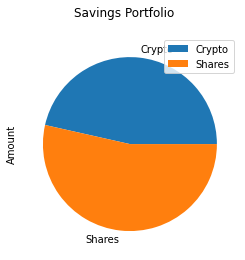

In [123]:
# Plot savings pie chart

df_savings['Amount'].plot(kind='pie', labels= df_savings[''], subplots=True, title='Savings Portfolio')

In [124]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_total + shares_total

# Validate saving health and print a message for user based on their savings
if total_savings > emergency_fund:
    print('Congratulations! You have an ideal amount of savings.')
elif total_savings == emergency_fund:
    print('Congratulations! You have reached an ideal savings account.')
elif total_savings < emergency_fund:
    print(f'You are {emergency_fund - total_savings} away from an ideal amount of savings')


Congratulations! You have an ideal amount of savings.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [88]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [163]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    ['SPY', 'AGG'],
    timeframe,
    start= start_date,
    end= end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.tail()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation= 500,
    num_trading_days=252*30
)

In [131]:
# Printing the simulation input data
MC_thirtyyears.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                    KO  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  110.74   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  110.89   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  110.91   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  110.92   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [132]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 110.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 120.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 130.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 140.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 150.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 160.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 170.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 180.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 190.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 200.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 210.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 220.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 230.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 240.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 250.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 260.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 270.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 280.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 290.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 300.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 310.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 320.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 330.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 340.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 350.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 360.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 370.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 380.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 390.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 400.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 410.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 420.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 430.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 440.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 450.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 460.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 470.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 480.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

Running Monte Carlo simulation number 490.


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-API

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000366,0.999404,1.003933,1.000058,1.002770,0.999789,1.003537,0.998065,1.000221,1.000151,...,1.003040,1.001331,0.995959,1.001224,0.998125,1.002706,0.997584,0.996691,1.001576,0.994181
2,1.003129,0.996980,1.003534,0.997745,0.996905,1.000987,1.005340,0.997226,0.999716,0.999583,...,1.001463,1.003075,0.999906,1.002858,1.001305,1.001579,1.001089,0.993719,1.004294,0.996240
3,1.005572,1.001417,1.003802,0.996049,0.998464,1.001418,1.005500,1.000231,1.000955,0.999072,...,1.000826,0.999919,1.003463,0.996591,1.002468,1.001337,1.006777,0.993027,1.004067,0.999054
4,1.000627,1.002192,1.003562,0.994568,0.995485,1.004438,1.007434,1.000233,1.004519,1.003189,...,1.001908,1.000357,1.003884,0.997911,0.999924,1.004481,1.006952,0.992860,1.003804,1.000190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.967508,1.051401,0.996689,0.992236,0.972451,0.955500,1.014752,1.019508,1.016129,1.040986,...,1.047195,1.055165,0.991207,0.977005,0.975649,1.026348,1.083927,1.030963,0.990964,1.036494
249,0.968366,1.049957,0.991817,0.993198,0.970917,0.955914,1.014239,1.023862,1.013761,1.042293,...,1.046699,1.056491,0.994745,0.976990,0.974433,1.022659,1.085408,1.034937,0.990220,1.038280
250,0.967406,1.051335,0.995078,0.997082,0.971450,0.955906,1.016833,1.023461,1.014074,1.043796,...,1.050978,1.056234,0.994439,0.980070,0.974365,1.021911,1.080182,1.033258,0.987199,1.036633
251,0.968179,1.050989,0.999938,1.000008,0.970071,0.956784,1.017078,1.022120,1.013908,1.043863,...,1.054831,1.054797,0.996332,0.979975,0.971798,1.021602,1.080043,1.034600,0.985394,1.037772


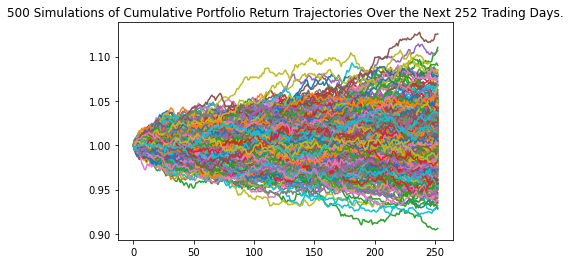

In [133]:
# Plot simulation outcomes
line_plot = MC_thirtyyears.plot_simulation()

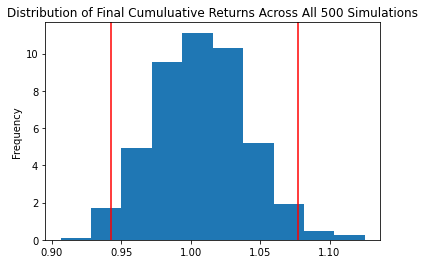

In [134]:
# Plot probability distribution and confidence intervals
t_plot = MC_thirtyyears.plot_distribution()

### Retirement Analysis

In [135]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyears.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.006960
std               0.033885
min               0.906132
25%               0.985045
50%               1.007543
75%               1.028706
max               1.125467
95% CI Lower      0.942639
95% CI Upper      1.077372
Name: 252, dtype: float64


/Users/Shane/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [136]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000, 2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $9426.39 and $10773.72


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000, 2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143392.41 and $1921608.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


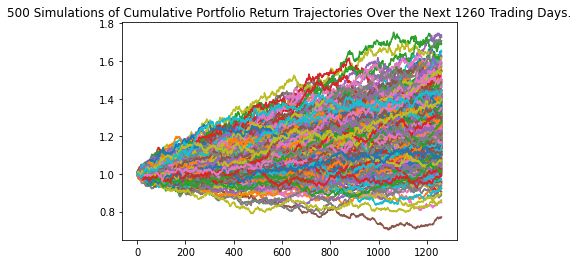

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

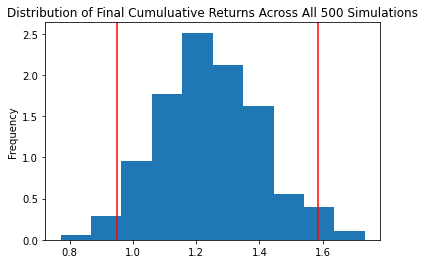

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


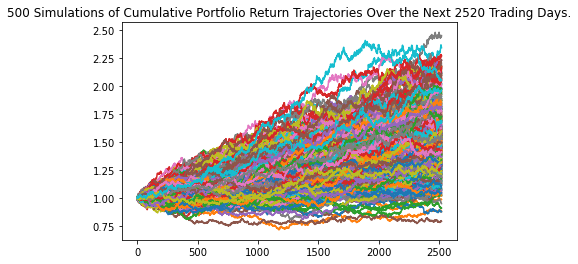

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

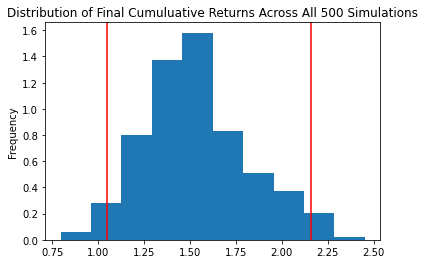

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
